In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [61]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [62]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [63]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [64]:
customers.duplicated().sum()

0

In [65]:
products.duplicated().sum()

0

In [66]:
transactions.duplicated().sum()

0

In [67]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [68]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [69]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [70]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [71]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [72]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [73]:
customers.info()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [74]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


Text(0, 0.5, 'No. of Customers')

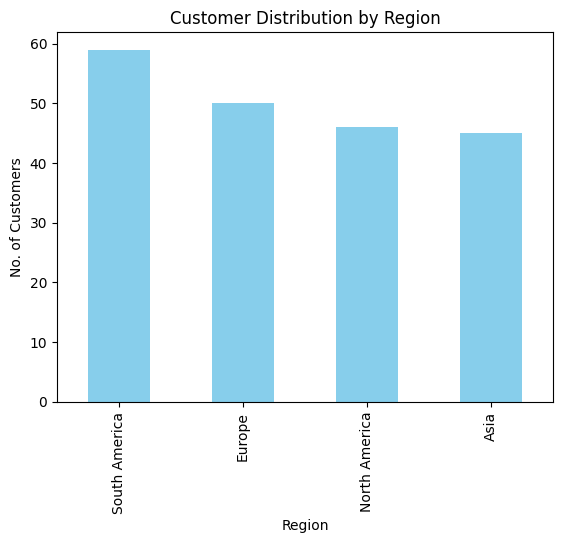

In [75]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Distribution by Region', color='skyblue')
plt.xlabel('Region')
plt.ylabel('No. of Customers')

In [76]:
for i,j in pd.DataFrame(customers['Region'].value_counts()).iterrows():
    print(i,'-',j['Region']*100/len(customers))

South America - 29.5
Europe - 25.0
North America - 23.0
Asia - 22.5


Text(0, 0.5, 'No. of Signups')

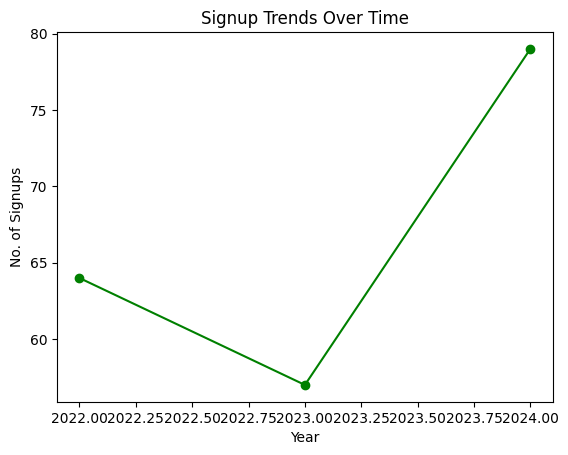

In [77]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind='line', marker='o', title='Signup Trends Over Time', color='green')
plt.xlabel('Year')
plt.ylabel('No. of Signups')

Text(0, 0.5, 'Product Name')

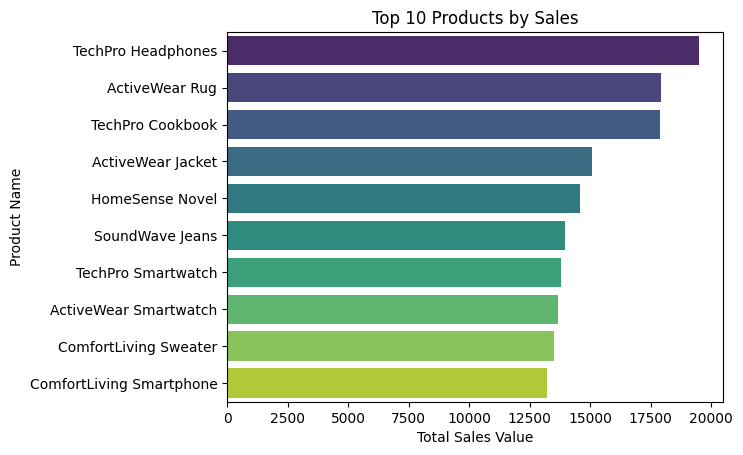

In [78]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index().merge(products, on='ProductID')
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Name')

Text(0, 0.5, 'Frequency')

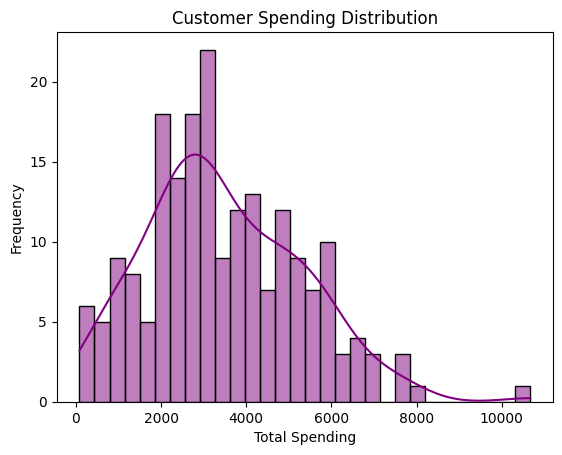

In [79]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
sns.histplot(customer_spending, kde=True, color='purple', bins=30)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')

Text(0, 0.5, 'Total Revenue')

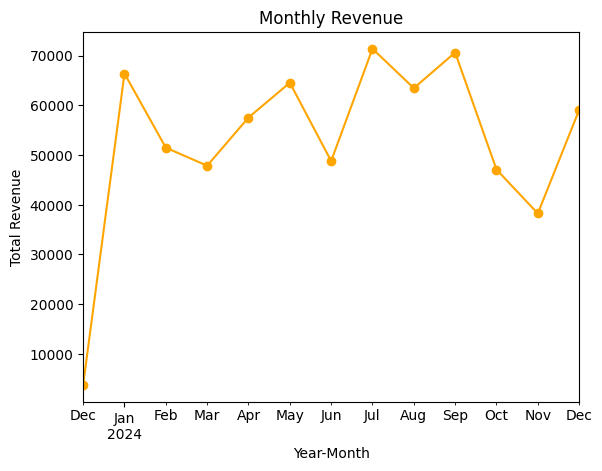

In [80]:
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('YearMonth')['TotalValue'].sum()
monthly_revenue.plot(kind='line', marker='o', title='Monthly Revenue', color='orange')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')